In [1]:
import pandas as pd 

In [127]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [128]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [129]:
df.drop(['id'],axis=1,inplace=True)

In [130]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [131]:
na_count = []

for i in range(0,len(df.columns)):
    na_count.append(df[df.columns[i]].isna().sum())

na_df = pd.DataFrame(zip(df.columns,na_count))
na_df.columns = ['parameter','na']
na_df

,parameter,na
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,201
9,smoking_status,0


In [132]:
for i in ['gender','hypertension','heart_disease','ever_married','work_type',\
          'Residence_type','smoking_status','stroke']:
    print("the unique values for {}:".format(i))
    print(round(df[i].value_counts(normalize= True),2),'\n')

the unique values for gender:
Female    0.59
Male      0.41
Other     0.00
Name: gender, dtype: float64 

the unique values for hypertension:
0    0.9
1    0.1
Name: hypertension, dtype: float64 

the unique values for heart_disease:
0    0.95
1    0.05
Name: heart_disease, dtype: float64 

the unique values for ever_married:
Yes    0.66
No     0.34
Name: ever_married, dtype: float64 

the unique values for work_type:
Private          0.57
Self-employed    0.16
children         0.13
Govt_job         0.13
Never_worked     0.00
Name: work_type, dtype: float64 

the unique values for Residence_type:
Urban    0.51
Rural    0.49
Name: Residence_type, dtype: float64 

the unique values for smoking_status:
never smoked       0.37
Unknown            0.30
formerly smoked    0.17
smokes             0.15
Name: smoking_status, dtype: float64 

the unique values for stroke:
0    0.95
1    0.05
Name: stroke, dtype: float64 



In [133]:
pd.crosstab(df.loc[df['bmi'].isna()].smoking_status,
            df.loc[df['bmi'].isna()].stroke,
            margins= True)

stroke,0,1,All
smoking_status,,,
Unknown,43,18,61
formerly smoked,35,13,48
never smoked,34,6,40
smokes,49,3,52
All,161,40,201


In [134]:
print(df.loc[df['gender']=='Male']['bmi'].describe(),'\n')
print(df.loc[df['gender']=='Female']['bmi'].describe(),'\n')

count    2011.000000
mean       28.647936
std         7.464493
min        11.500000
25%        24.000000
50%        28.400000
75%        32.500000
max        97.600000
Name: bmi, dtype: float64 

count    2897.000000
mean       29.065758
std         8.110783
min        10.300000
25%        23.400000
50%        27.800000
75%        33.500000
max        78.000000
Name: bmi, dtype: float64 



In [135]:
#To replace missing values in bmi, median bmi for male and female will be used as it only occupied 4% of the data 
#and will not affect the distribution of the data.

df.loc[df['gender']=='Male','bmi'] = df.loc[df['gender'] == 'Male']['bmi'].fillna(28.4)
df.loc[df['gender']=='Female', 'bmi'] = df.loc[df['gender'] == 'Female']['bmi'].fillna(27.8)

In [136]:
df.loc[df['gender']=='Female', 'bmi']

1       27.8
3       34.4
4       24.0
7       22.8
8       27.8
        ... 
5104    18.6
5105    27.8
5106    40.0
5107    30.6
5109    26.2
Name: bmi, Length: 2994, dtype: float64

In [142]:
df.gender

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

### The data is split into x and y for later processing.

In [150]:
df_x = df.iloc[:,0:-1]
df_y = df.iloc[:,-1]

In [151]:
df_x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [164]:
categorical_cols=['gender','ever_married','work_type','Residence_type','smoking_status']
df_x_1hot = pd.get_dummies(df_x,columns= categorical_cols)
df_x_1hot

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,27.8,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,27.8,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


### Additional dummy variables are dropped as number of dummy variables should be n-1. If the categorical variable has 3 unique values, only 2 dummy variables are generated.

In [165]:
df_x_1hot.drop(['gender_Male','ever_married_No','work_type_Never_worked',
                            'Residence_type_Rural','smoking_status_never smoked'],axis= 1, inplace= True)
df_x_1hot['stroke'] = df_y

df_1hot = df_x_1hot

df_1hot['stroke'] = df_y

df_1hot


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,0,1,0,1,0,0,1,0,1,0,1
1,61.0,0,0,202.21,27.8,1,0,1,0,0,1,0,0,0,0,0,1
2,80.0,0,1,105.92,32.5,0,0,1,0,1,0,0,0,0,0,0,1
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,27.8,1,0,1,0,1,0,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,1,0,1,0,0,1,0,1,0,0,0,0
5107,35.0,0,0,82.99,30.6,1,0,1,0,0,1,0,0,0,0,0,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,1,0,0,0,0,1,0,0


## Data Exploration

 This section will use various data visualisation techniques to understand the relationships among the variables in terms of distribution and correlation.

In [175]:
import seaborn as sns 
import matplotlib.pyplot as plt


/Users/mehdi/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mehdi/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mehdi/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexin

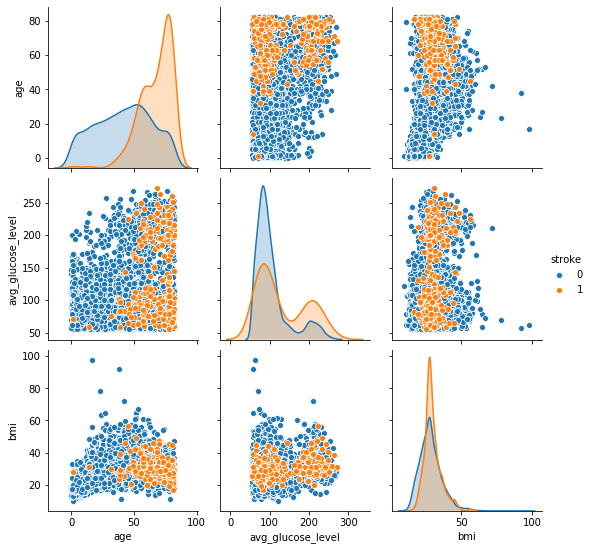

In [182]:

sns.pairplot(df_1hot.loc[:,["age",'avg_glucose_level','bmi','stroke']],
             hue="stroke")
plt.show()

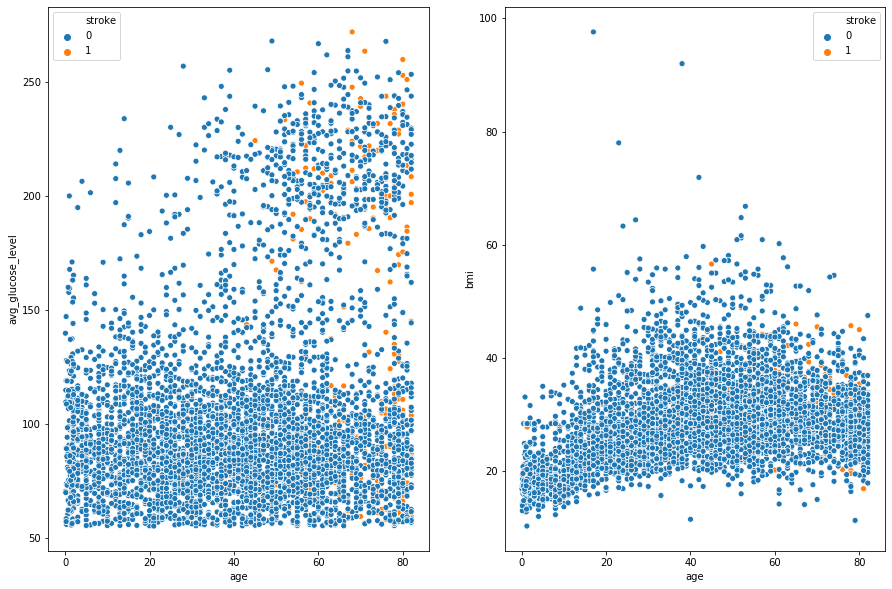

In [189]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
sns.scatterplot(data = df_1hot ,
                x = 'age', y= 'avg_glucose_level', hue='stroke',ax= ax[0] )
sns.scatterplot(data= df_1hot,
               x= 'age', y= 'bmi', hue= 'stroke', ax= ax[1])


If looking at the scatterplot between age with avg_glucose_level and age with bmi, patients with stroke are tend to be older while their avg_glucose_level and bmi are similar with patients without stroke. Therefore, the best models to classify the classes are:

#### logistic regression:
can use a probablistic formula to create a non-linear boundary

#### decision tree:
create multiple orthogonal boundaries for classification through data parititioning